In [1]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('placement.csv')

In [11]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [17]:
df.shape

(100, 4)

In [19]:
df = df.iloc[:,1:]

In [21]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [23]:
import matplotlib.pyplot as plt

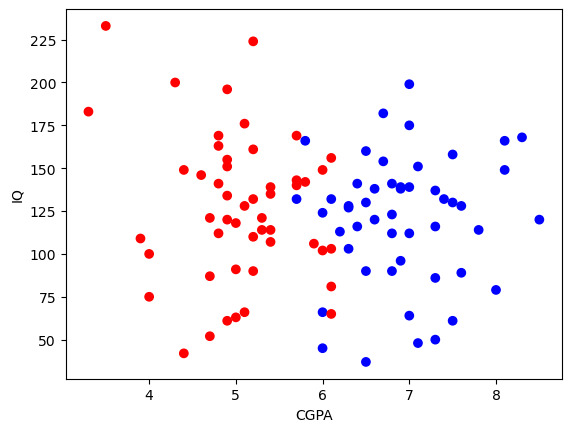

In [31]:
color_map = {1: 'blue', 0: 'red'}
colors = df['placement'].map(color_map)

plt.scatter(df['cgpa'], df['iq'], c=colors)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()

In [35]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [43]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [45]:
y.shape

(100,)

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [51]:
X_train

,cgpa,iq
49,5.4,135.0
77,7.3,50.0
15,5.1,176.0
94,4.7,52.0
17,3.3,183.0
...,...,...
63,6.3,128.0
8,6.1,156.0
99,6.2,113.0
98,6.3,103.0


In [53]:
y_train

49    0
77    1
15    0
94    0
17    0
     ..
63    1
8     0
99    1
98    1
30    1
Name: placement, Length: 90, dtype: int64

In [55]:
X_test

,cgpa,iq
82,6.5,37.0
11,6.9,138.0
33,6.0,149.0
89,4.9,151.0
26,7.0,199.0
92,5.2,110.0
1,5.9,106.0
70,6.3,127.0
88,4.4,149.0
16,5.2,224.0


In [57]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [61]:
X_train = scaler.fit_transform(X_train)


In [64]:
X_train

array([[-0.52238923,  0.34336454],
       [ 1.10769396, -1.87891865],
       [-0.77977079,  1.41528937],
       [-1.1229462 , -1.82662963],
       [-2.32406013,  1.59830093],
       [ 1.10769396, -0.15338111],
       [ 0.07816773, -1.0684389 ],
       [-0.86556464, -0.80699382],
       [-0.95135849,  0.31722003],
       [ 2.13722018, -0.04880308],
       [ 0.50713699,  0.42179806],
       [ 0.8503124 ,  1.38914487],
       [-0.17921382,  1.15384429],
       [ 1.70825092, -1.12072792],
       [ 1.27928166,  0.212642  ],
       [ 0.93610625, -1.93120767],
       [-0.95135849,  1.93817954],
       [-0.60818309, -0.02265857],
       [-1.80929702, -0.33639267],
       [-0.52238923, -0.38868169],
       [ 0.07816773, -0.49325972],
       [-1.03715235,  0.50023159],
       [-0.26500768,  0.47408708],
       [-1.1229462 , -0.02265857],
       [-0.77977079,  0.16035298],
       [-0.86556464, -0.1010921 ],
       [ 0.42134314,  0.99697724],
       [-2.15247242,  2.90552634],
       [-0.77977079,

In [66]:
X_test = scaler.transform(X_test)

In [68]:
X_test

array([[ 0.42134314, -2.21879726],
       [ 0.76451855,  0.42179806],
       [-0.00762612,  0.70938765],
       [-0.95135849,  0.76167667],
       [ 0.8503124 ,  2.01661306],
       [-0.69397694, -0.31024816],
       [-0.09341997, -0.4148262 ],
       [ 0.24975544,  0.13420848],
       [-1.38032775,  0.70938765],
       [-0.69397694,  2.67022576]])

In [70]:
from sklearn.linear_model import LogisticRegression

In [72]:
clf = LogisticRegression()

In [74]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred = clf.predict(X_test)

In [78]:
y_test

82    1
11    1
33    0
89    0
26    1
92    0
1     0
70    1
88    0
16    0
Name: placement, dtype: int64

In [80]:
from sklearn.metrics import accuracy_score
     

In [82]:
accuracy_score(y_test,y_pred)

0.9

In [90]:
!pip install mlxtend

In [92]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

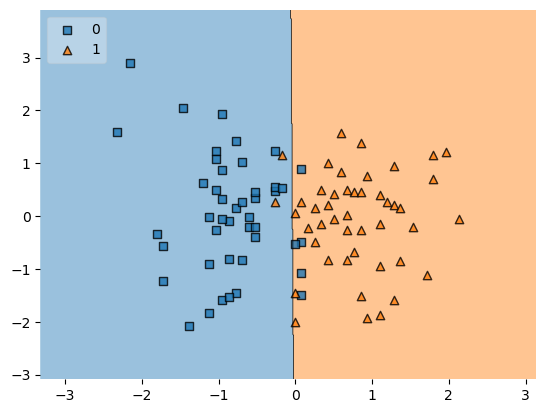

In [94]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [96]:
import pickle

In [98]:
pickle.dump(clf,open('model.pkl','wb'))